# Introductory applied machine learning (INFR10069)

# Assignment 2: Linear regression

## Marking Breakdown

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.

## Mechanics

Fill out this notebook, save it, and **submit it electronically as described below.**

On a DICE environment, open the terminal, navigate to the location of this notebook, and submit this notebook file using the following command:

`submit iaml cw1 05_Assignment_2.ipynb`

What actually happens in the background is that your file is placed in a folder available to markers. If you submit a file with the same name into the same location, **it will *overwrite* your previous submission**. You can check the status of your submissions with the `show_submissions` command.

**Distance Learners:** To copy your work up to DICE (such that you can use the `submit` command) you can use `scp` or `rsync` (you may need to install these yourself). You can copy files up using `student.ssh.inf.ed.ac.uk`, then ssh in to submit, e.g. (in a unix terminal):
```
filename=05_Assignment_2.ipynb
local_scp_filepath=~/git/iaml2017/${filename}
UUN=s0816700
server_address=student.ssh.inf.ed.ac.uk
scp -r ${local_scp_filepath} ${UUN}@${server_address}:${filename}
# rsync -rl ${local_scp_filepath} ${UUN}@${server_address}:${filename}
ssh ${UUN}@${server_address}
ssh student.login
submit iaml cw1 05_Assignment_2.ipynb
```

**Late submissions:** The policy stated in the School of Informatics MSc Degree Guide is that normally you will not be allowed to submit coursework late. See http://www.inf.ed.ac.uk/teaching/years/msc/courseguide10.html#exam for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you should NOT borrow actual text or code from other students. We ask that you provide a list of the people who you've had discussions with (if any).

**Resubmission:** If you submit your file again, the previous submission is **overwritten**. We will mark the version that is in the submission folder at the deadline.

## Important Instructions

1. You *MUST* have your environment set up as in the [README](https://github.com/JamesOwers/iaml2017) and you *must activate this environment before running this notebook*:
```
source activate iaml
cd iaml_2017
jupyter notebook
# Navigate to this file
```

1. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers.

1. The .csv files that you will be using are located at `./datasets` (the `datasets` directory is adjacent to this file).

1. **IMPORTANT:** Keep your answers brief and concise. Most written questions can be answered with 2-3 lines of explanation.

## Imports

Execute the cell below to import all packages you will be using in the rest of the assignemnt.

In [4]:
from __future__ import print_function, division
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split, KFold, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
%matplotlib inline

## Description of the dataset
This assignment is based on the automobile pricing dataset. Our goal will be to predict the price of automobiles based on various attributes. This data set consists of three types of entities: 

1. The specification of an automobile in terms of various characteristics 

1. Assigned insurance risk rating 
   * this rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuaries call this process ”symboling”. A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe. 

1. Normalized losses in use as compared to other cars
  * the third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year (avg_loss/car/year). 


To save you time and to make the problem manageable with limited computational resources, we preprocessed the original dataset. We removed any instances that had one or more missing values and randomized the data set. The resulting representation is much more compact and can be used directly to perform our experiments.


## 1. Simple Linear Regression [50%]
We will begin by studying a simple Linear Regression model. Such a model will consider the relationship between a dependent (response) variable and only one independent (explanatory) variable. When applying machine learning in practice it can be prudent to start out simple in order to get a feeling for the dataset and for any potential difficulties that might warrant a more sophisticated model. In this Section we will consider one independent variable (i.e. feature) `engine-power` against the dependent variable (i.e. target) `price`.

### ========== Question 1.1 --- [1 mark] ==========
Load the dataset `train_auto_numeric.csv` into a pandas DataFrame called `auto_numeric`. Display the number of data points and attributes in the dataset.

In [8]:
# Your code goes here
data_path = os.path.join(os.getcwd(), 'datasets', 'train_auto_numeric.csv')
auto_numeric = pd.read_csv(data_path, delimiter = ',')

### ========== Question 1.2 --- [1 mark] ==========
Display the first 8 instances of the dataset.

In [3]:
# Your code goes here
pd.set_option('display.max_columns', None)
auto_numeric.head(8)

,normalized-losses,wheel-base,length,width,height,engine-size,bore,stroke,compression-ratio,engine-power,peak-rpm,city-mpg,highway-mpg,mean-effective-pressure,torque,price
0,164.0,99.8,176.6,66.2,54.3,8.85,3.19,3.40,10.0,102000.0,5500.0,24.0,30.0,40.52,57.68,13950.0
1,110.0,99.4,162.4,66.4,54.3,15.18,3.19,3.40,8.0,115000.0,5500.0,18.0,22.0,47.39,59.59,17450.0
2,158.0,105.8,192.7,71.4,51.6,15.18,3.94,2.80,8.5,70000.0,4400.0,28.0,30.0,0.85,3344.79,17710.0
3,106.0,86.6,158.7,67.7,55.9,13.74,3.13,3.50,7.8,140000.0,5600.0,32.0,20.0,44.74,68.97,23875.0
4,192.0,101.2,176.8,64.8,54.3,8.67,3.50,2.80,8.8,101000.0,5800.0,23.0,29.0,44.78,53.48,16430.0
5,194.0,110.0,190.9,71.4,58.7,8.67,3.78,3.90,22.5,101000.0,6000.0,47.0,53.0,1.80,1330.28,16925.0
6,188.0,101.2,176.8,64.8,54.3,26.58,3.31,3.19,9.0,121000.0,4250.0,21.0,28.0,7.19,377.06,20970.0
7,150.0,101.2,176.8,64.8,56.1,26.58,3.03,3.19,8.0,134000.0,4400.0,28.0,37.0,57.37,48.20,21105.0


### ========== Question 1.3 --- [1 mark] ==========
Display the summary statistics for the dataset.

In [4]:
# Your code goes here
auto_numeric.describe()

,normalized-losses,wheel-base,length,width,height,engine-size,bore,stroke,compression-ratio,engine-power,peak-rpm,city-mpg,highway-mpg,mean-effective-pressure,torque,price
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,121.955975,98.559748,171.698113,65.729560,53.925157,14.056352,3.294528,3.219874,10.446855,98528.301887,5072.012579,27.113208,32.327044,46.180503,200.055031,11684.723270
std,39.434186,5.803361,12.656791,2.292021,2.410446,17.143568,0.296959,0.381833,4.414796,34123.715967,549.988239,7.848229,8.231998,28.780966,513.289289,6744.910579
min,65.000000,86.600000,141.100000,60.300000,49.400000,3.390000,2.540000,2.070000,7.000000,48000.000000,4150.000000,15.000000,18.000000,0.490000,19.400000,5118.000000
25%,93.000000,94.500000,163.400000,64.000000,52.000000,6.960000,3.050000,3.070000,8.600000,69000.000000,4800.000000,22.000000,26.500000,21.775000,34.140000,7372.000000
50%,110.000000,97.000000,171.700000,65.400000,54.100000,9.030000,3.270000,3.270000,9.000000,92000.000000,5100.000000,26.000000,32.000000,49.800000,55.900000,9233.000000
75%,145.000000,101.200000,177.800000,66.500000,55.600000,14.885000,3.580000,3.410000,9.400000,116000.000000,5450.000000,31.000000,37.000000,68.495000,119.990000,14719.500000
max,256.000000,115.600000,202.600000,71.700000,59.800000,174.160000,3.940000,4.170000,23.000000,200000.000000,6600.000000,49.000000,54.000000,99.850000,3912.870000,42056.000000


### ========== Question 1.4 --- [2 marks] ==========
Produce a scatter plot of `price` against `engine-power`. Label axes appropriately and include a title in your plot.

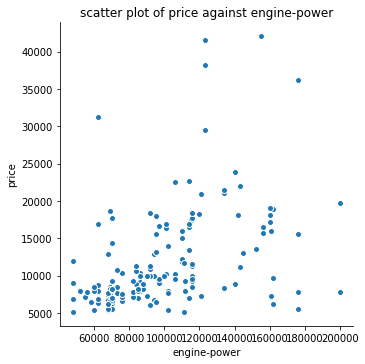

In [82]:
# Your code goes here
g1 = sns.pairplot(data=auto_numeric, x_vars='engine-power', y_vars = 'price', size=5)
plt.title('scatter plot of price against engine-power')

### ========== Question 1.5 --- [2 marks] ==========
Do you think that engine-power alone is sufficient for predicting the price? Can you make any other observations on the data from the above plot? Please explain your answer in 2-3 sentences. 

*Your answer goes here*  
No, there is no correlation between engine-power and price, so engine-power alone is not sufficient for predicting the price.

### ========== Question 1.6 --- [2 marks] ==========
Visualise the distribution of the car prices. Choose a sensible value for the number of bins in the histogram. Again, label axes appropriately and include a title in your plot.

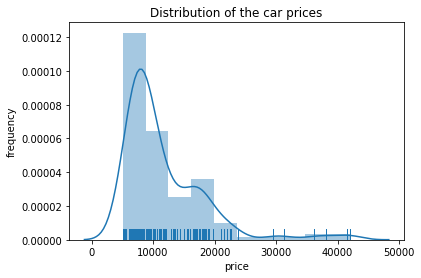

In [129]:
# Your code goes here
#g = sns.distplot((auto_numeric['price']- np.average(auto_numeric['price']))/ np.std(auto_numeric['price']) , bins=6, rug=True)
plt.title('Distribution of the car prices')
gg = sns.distplot(auto_numeric['price'], bins=10, rug=True)
plt.ylabel('frequency')

### ========== Question 1.7 --- [2 marks] ==========
How could you preprocess the data to improve the performance of linear regression? Don’t do it at this stage, but instead in one sentence explain why you would do what you suggested.

*Your answer goes here*  
Linear regression model assumes that variables have normal distributions. Non-normally distributed variables (highly skewed) can distort the relationships and significance tests. And linear regression is sensitive to outliers.   
So a graphical diagnostics can be useful for checking whether the variables is highly skew or if there are obvious outliers. If so, we will use normalization and other transformations(e.g.,square root, log, or inverse) methods to improve the normality. 

### ========== Question 1.8 --- [1 mark] ==========
Now we want to build a simple linear regression model. First we need to define our input and target variables. Store the values of the attribute `engine-power` in a vector `X` and the values of our target variable `price` in a vector `y`.

In [10]:
# Your code goes here
X = auto_numeric['engine-power'].values
y = auto_numeric['price'].values

### ========== Question 1.9 --- [1 mark] ==========
For technical reasons, we need to convert `X` into a 2D array, otherwise we will receive an error when trying to use it for building models. Perform this transformation and confirm that the shape of the resulting array is (`n`,1) where `n` is the number of instances in the dataset. 

In [11]:
# Your code goes here
X = X.reshape((len(X),1))
X.shape

(159, 1)

### ========== Question 1.10 --- [1 mark] ==========
Now we want to use Hold-out validation to split the dataset into training and testing subsets. Use 80% of the data for training and the remaining 20% for testing. Store your data into matrices `X_train`, `X_test`, `y_train`, `y_test`.

In [12]:
# Your code goes here
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

### ========== Question 1.11 --- [2 marks] ==========
By using Scikit-learn's [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) fit a model to the training data. When initialising the model, set the `normalize` parameter to `True` and use default settings for the other parameters.

In [13]:
# Your code goes here
lm = LinearRegression(normalize=True)
lm.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

### ========== Question 1.12 --- [2 marks] ==========
By looking into the attributes of your model, write down an equation for predicting the price of a car given the engine-power.

In [14]:
# Your code goes here
print(lm.coef_,lm.intercept_ )
price = lm.coef_[0]*X+lm.intercept_
# price = 0.08988389*X + 2823.1218911 

[ 0.08988389] 2823.1218911


### ========== Question 1.13 --- [3 marks] ==========
What happens to the price as one more unit of engine-power is added? By examining the magnitude of the regression coefficient is it possible to tell whether or not engine-power is an important influential variable on price? Explain your answer in 1-2 sentences.

*Your answer goes here*  
The price increase 0.08988 as one more unit of engine-power is added.
The magnitude of the regression coefficient is relatively small compared to the magnitude of price and engine-power, so it is possible to tell that engine-power is not an important influential variable on price.

### ========== Question 1.14 --- [2 marks] ==========
Produce a scatter plot similar to the one in Question 1.4 but use training data only this time. Add the regression line to the plot and show the predictions on the training set by using a different marker. Label axes appropriately and add a title to the graph. 

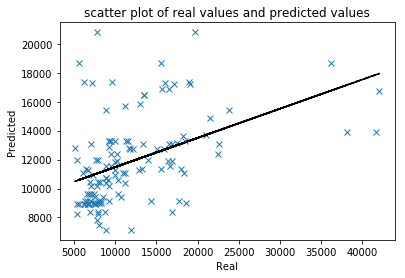

In [166]:
# Your code goes here
fit = np.polyfit(y_train,prediction,1)
fit_fn = np.poly1d(fit) 
# fit_fn is now a function which takes in x and returns an estimate for y
plt.title('scatter plot of real values and predicted values')
plt.plot(y_train,prediction, 'x', y_train, fit_fn(y_train), '--k')
plt.xlabel('Real')
plt.ylabel('Predicted')

### ========== Question 1.15 --- [2 marks] ==========
So far we have used Hold-out validation. Can you think of a disadvantage of using this method, especially when dealing with small datasets?

*Your answer goes here*  
There may exist bias between the split train/test set which have classes in different proportions.

### ========== Question 1.16 --- [1 mark] ==========
Now we want to use k-fold cross-validation to evaluate the performance of the regression model. Famliriase yourself with the sklearn method [`KFold`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) and make sure you understand the differences between Hold-out and K-fold cross-validation. By using Scikit-learn's [`KFold`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) class construct a 5-fold cross-validation object. Set the `shuffle` parameter to `True` and `random_state` to `0`. Use the object to print the training and validation indices for the `auto_numeric` dataset (hint: see the `split` method).

In [11]:
# Your code goes here
kf = KFold(n_splits=5, random_state=0, shuffle=True)
n=0
for train_index, test_index in kf.split(X):
    n+=1
    print('Fold {}\n{}\n{}\n{}\n{}\n\n'.format(n,"TRAIN:", train_index, "TEST:", test_index))

Fold 1
TRAIN:
[  0   1   2   3   4   5   6   9  10  11  12  13  14  15  16  17  18  20
  21  22  23  25  27  28  29  30  31  32  34  35  36  38  39  41  42  43
  46  47  48  49  50  51  52  53  55  57  58  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  84  87  88  89  91  92
  93  94  96  97  98  99 100 101 102 103 104 105 106 107 108 109 111 112
 113 114 115 116 117 118 121 122 123 124 125 127 129 130 132 133 135 136
 137 138 139 140 141 143 145 146 147 149 150 151 152 153 154 155 156 157
 158]
TEST:
[  7   8  19  24  26  33  37  40  44  45  54  56  59  60  61  62  63  83
  85  86  90  95 110 119 120 126 128 131 134 142 144 148]


Fold 2
TRAIN:
[  0   1   3   4   5   6   7   8   9  11  12  13  14  15  17  19  20  21
  23  24  25  26  28  29  31  32  33  34  35  36  37  38  39  40  41  42
  44  45  46  47  48  49  50  52  53  54  55  56  57  58  59  60  61  62
  63  64  65  67  68  69  70  72  75  76  77  78  79  81  82  83  84  85
  86  87  88  90  91  92

### ========== Question 1.17 --- [3 marks] ==========
By making use of the iterator you constructed in the previous question, loop through the 5 folds and display the mean value of the `price` variable for the training instances in each fold.

In [13]:
# Your code goes here
n=0
for train_index, test_index in kf.split(X):
    n+=1
    #print('Fold {}\n{}\n{}\n{}\n{}\n\n'.format(n,"TRAIN:", train_index, "TEST:", test_index))
    print('Fold {} average of price = {}'.format(n,np.mean(y[test_index])))

Fold 1 average of price = 11015.8125
Fold 2 average of price = 11878.1875
Fold 3 average of price = 11664.28125
Fold 4 average of price = 11585.09375
Fold 5 average of price = 12299.4516129


### ========== Question 1.18 --- [3 marks] ==========
Now initialise a new `LinearRegression` model and fit it by making use of the cross-validation iterator, the `X` and `y` arrays defined above and the [`cross_val_predict`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html) function. Display the shape of your prediction and confirm it has the same dimensionality as your `y` vector.

In [10]:
# Your code goes here
new_lr = LinearRegression(normalize=True)
cv_predict = cross_val_predict(new_lr, X, y, cv = kf)
cv_predict.shape

(159L,)

### ========== Question 1.19 --- [2 marks] ==========
Report the Coefficient of Determination (R^2), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE) and Correlation Coefficient (CC) from the simple linear regression model you build in Question 1.18. *Hint: RMSE is the square root of the Mean Squared Error (MSE). For CC you might find numpy's [`corrcoef`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.corrcoef.html) function useful.* 

In [98]:
# Your code goes here
COD = r2_score(y,cv_predict)
MAE = mean_absolute_error(y,cv_predict)
RMSE = np.sqrt(mean_squared_error(y, cv_predict))
CC = np.corrcoef(y,cv_predict)

print('''Coefficient of Determination (R^2): {}
Root Mean Squared Error (RMSE): {}
Mean Absolute Error (MAE): {}
Correlation Coefficient (CC): \n{}'''.format(COD,RMSE,MAE,CC))

Coefficient of Determination (R^2): 0.173005270976
Root Mean Squared Error (RMSE): 6114.45211862
Mean Absolute Error (MAE): 3987.95779619
Correlation Coefficient (CC): 
[[ 1.         0.4171222]
 [ 0.4171222  1.       ]]


### ========== Question 1.20 --- [4 marks] ==========
What do the above metrics intend to measure? Relate the values of CC, MAE and RMSE to the observations you made in Question 1.5. Explain your answer in 1-2 short paragraphs.

*Your answer goes here*  
The above metrics measure how well the model predict the values to the actual y on average. Here it shows that the model is poor.  
The low R^2 tells that the regression line fitted in the model poorly represents the real values and prediction. The big MAE and RMSE indicates that average absolute/squared distance between prediction and real price is big. And the RMSE is much larger than the MAE, so there may be many large residuals. Intuitively, a small positive CC here means the prediction could only capture a small part of the distribution of the real values. 



### ========== Question 1.21 --- [3 marks] ==========
Show a histogram of the residuals of the linear regression model (i.e. true - predicted values). Label axes appropriately and add a title to your plot. Does the distribution of residuals look like what you expected?

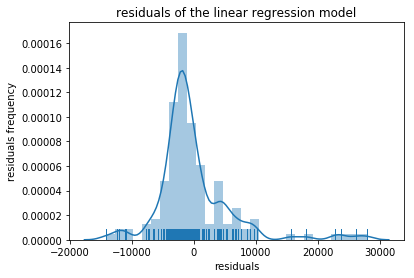

In [192]:
# Your code goes here
residuals = y - cv_predict
sns.distplot(residuals, rug=True)
plt.title('residuals of the linear regression model')
plt.xlabel('residuals')
plt.ylabel('residuals frequency')

*Your answer goes here*  
Based on the assumptions for residuals, we expect to see it to be (roughly) normal and (approximately) independently distributed with a mean of 0 and some constant variance. The errors seem to follow a roughly normal distribution, with large variance. But it is not centre at the 0, not symmetrical neither, so the model predict values higher than actual and lower than actual with unequal probability.

### ========== Question 1.22 --- [2 marks] ==========
Load the new dataset `train_auto_base.csv` into a pandas DataFrame `auto_base`. Again by using the `engine-power` attribute as predictor and `price` as target variable build a LinearRegression model on this dataset. Report the R^2, RMSE, MAE and CC metrics for this model by making use of the K-fold CV iterator constructed in Question 1.16.

In [96]:
# Your code goes here
auto_base = pd.read_csv(os.path.join(os.getcwd(), 'datasets', 'train_auto_base.csv'), delimiter = ',')
X_base = auto_base['engine-power'].values
X_base = X_base.reshape((len(X_base),1))
y_base = auto_base['price'].values
cv_predict_base = cross_val_predict(new_lr, X_base, y_base, cv = kf)

COD = r2_score(y_base,cv_predict_base)
MAE = mean_absolute_error(y_base,cv_predict_base)
RMSE = np.sqrt(mean_squared_error(y_base, cv_predict_base))
CC = np.corrcoef(y_base,cv_predict_base)

print('''Coefficient of Determination (R^2): {}
Root Mean Squared Error (RMSE): {}
Mean Absolute Error (MAE): {}
Correlation Coefficient (CC): \n{}'''.format(COD,RMSE,MAE,CC))

Coefficient of Determination (R^2): -0.00213595381121
Root Mean Squared Error (RMSE): 6730.84360395
Mean Absolute Error (MAE): 4901.86096203
Correlation Coefficient (CC): 
[[ 1.         -0.06191442]
 [-0.06191442  1.        ]]


### ========== Question 1.23 --- [2 marks] ==========
Show a scatter plot of predicted vs. true prices and another one of predicted price vs. engine-power. Use a single plot with two subplots. Label axes appropriately.

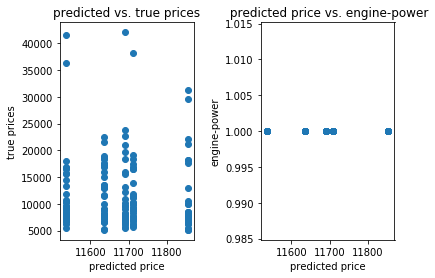

In [47]:
# Your code goes here
fig, (ax1,ax2) = plt.subplots(1,2)
plt.subplots_adjust(wspace=0.5)
ax1.scatter(cv_predict_base,y)
ax1.set_title('predicted vs. true prices')
ax1.set_xlabel('predicted price')
ax1.set_ylabel('true prices')
ax2.scatter(cv_predict_base,auto_base['engine-power'])
ax2.set_title(' predicted price vs. engine-power')
ax2.set_xlabel('predicted price')
ax2.set_ylabel('engine-power')
plt.show()

### ========== Question 1.24 --- [3 marks] ==========
What is the simplest baseline model for the purposes of regression? Relate your answer to the regression model you have just built as part of this question. Can the predictions of this model be justified given the procedure you followed to train it?

In [84]:
aver_price = np.mean(y_base)*np.ones(len(y_base))
print('(R^2) for baseline model: {}'.format(r2_score(y_base,aver_price)))

(R^2) for baseline model: 0.0


*Your answer goes here*   
1. What is the simplest baseline model for the purposes of regression?  
A baseline model for the purposes of regression could be a model that always predict the result as the average of the price in training data. Which is a constant model that always predicts the expected value of price, disregarding the input features, with a R^2 score of 0.0.
2. Can the predictions of this model be justified given the procedure you followed to train it?  
The LinearRegression model's performance(-0.0021) is even worse than the baseline model(0).Actually, it is better to have an overview understanding of the data before any training. That is what the given procedure did not include. Problems like poor features, data contamination, outliers, or not enough data could leeds to poor performance of the model.


### ========== Question 1.25 --- [2 marks] ==========
Why do you think this model performs so poorly? (*Hint: Justify your answer by displaying some statistics about the `auto_base` dataset.*)

In [12]:
# Your code goes here
auto_base.describe()

,engine-power,price
count,159.0,159.000000
mean,1.0,11684.723270
std,0.0,6744.910579
min,1.0,5118.000000
25%,1.0,7372.000000
50%,1.0,9233.000000
75%,1.0,14719.500000
max,1.0,42056.000000


*Your answer goes here*  
The input feature engine-power values are all the same, while the corresponding price varies with large variance. A linear regression model could not learn much information from such data.

## 2. Multivariate Linear Regression [50%]
In this Section we will fit a Multivariate Linear Regression model (LinearRegression) to the dataset. In contrast to Part 1, we will now train a model with multiple explanatory variables and ascertain how they affect our ability to predict the retail price of a car. One of our foremost concerns will be to determine exactly which attributes to include in the model and which may be left out.

### ========== Question 2.1 --- [10 marks] ==========
Use the original dataset (`auto_numeric`) and a visualisation tool of your choice to examine whether or not any of the other attributes are particularly good at predicting the price. Can you find any? Do any attributes appear useless at predicting the price? Do any attributes exhibit significant correlations? As you answer these questions, list two attributes for each question but do not modify the dataset at this stage. Of the attributes you listed, which ones could you safely remove? Explain in 4-5 sentences. *Hint: you might find seaborn's [`pairplot`](https://seaborn.github.io/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot) function useful for this question.*

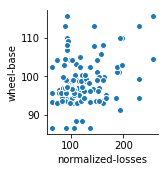

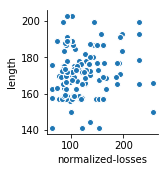

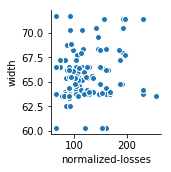

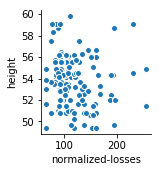

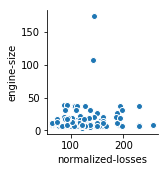

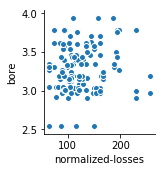

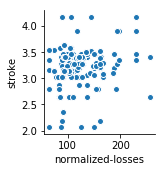

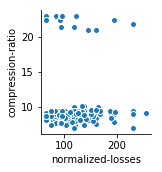

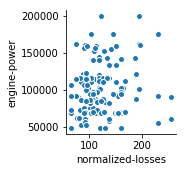

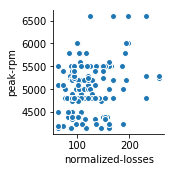

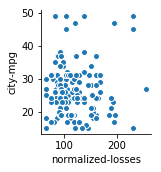

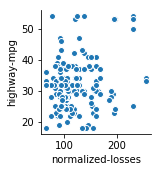

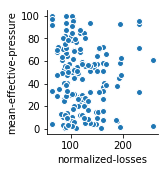

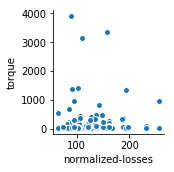

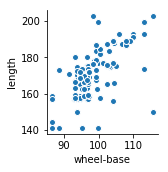

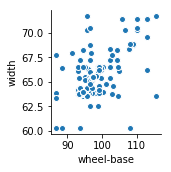

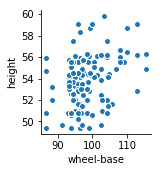

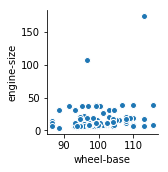

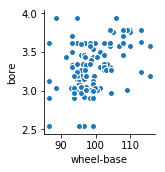

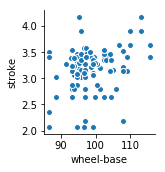

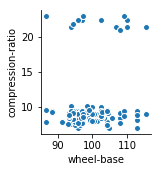

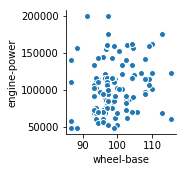

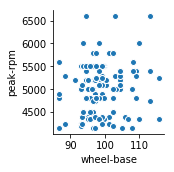

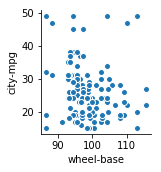

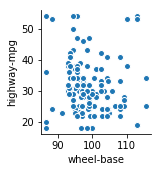

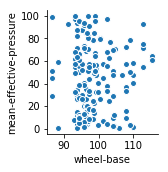

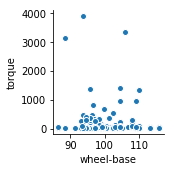

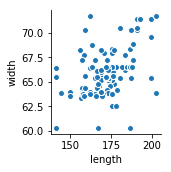

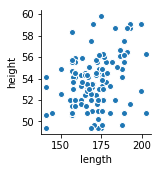

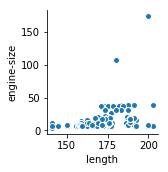

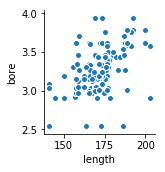

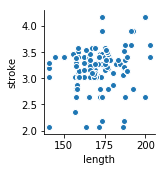

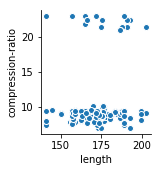

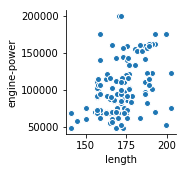

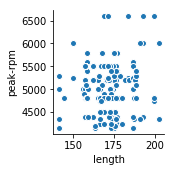

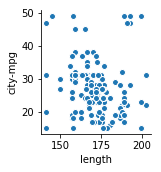

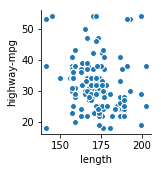

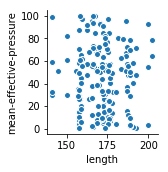

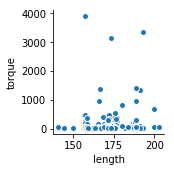

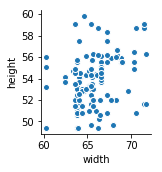

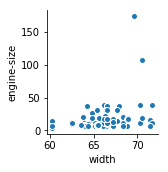

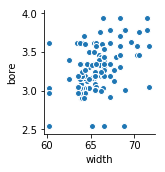

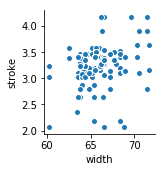

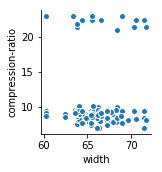

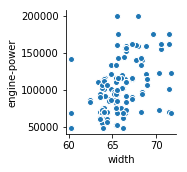

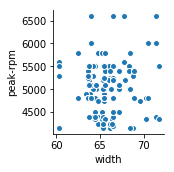

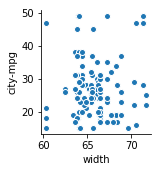

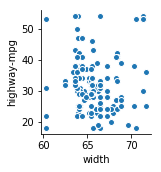

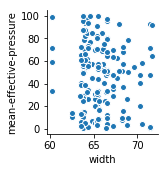

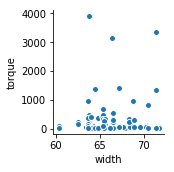

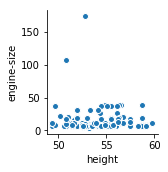

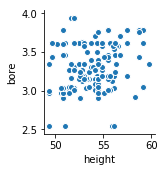

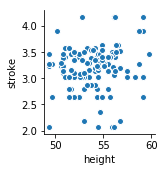

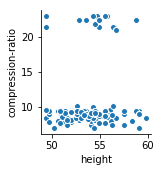

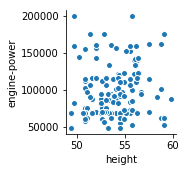

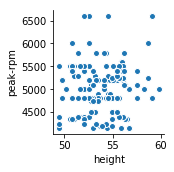

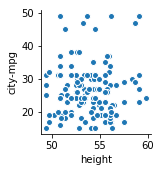

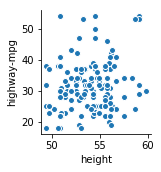

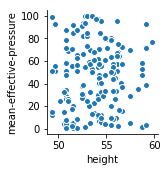

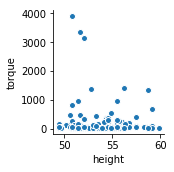

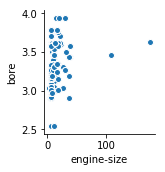

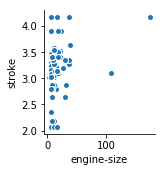

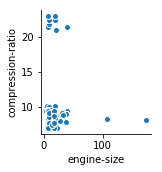

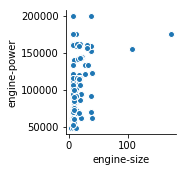

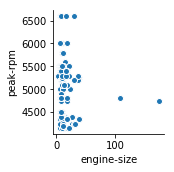

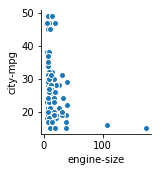

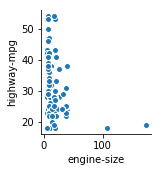

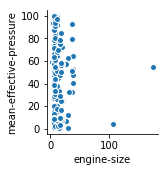

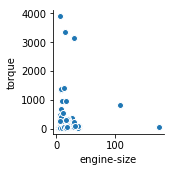

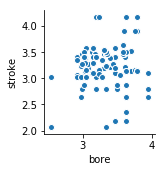

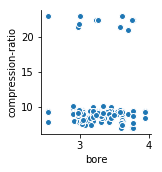

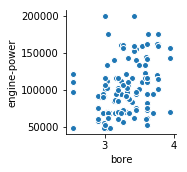

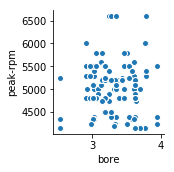

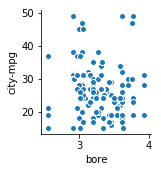

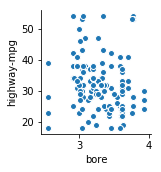

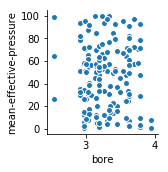

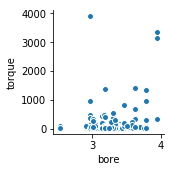

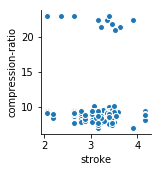

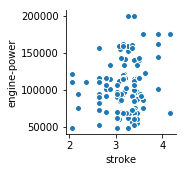

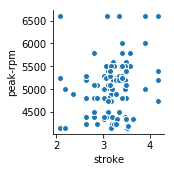

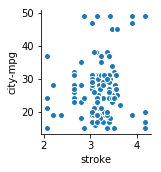

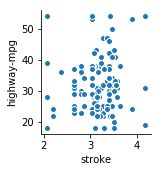

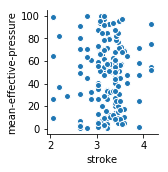

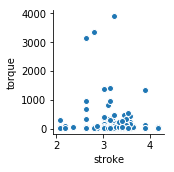

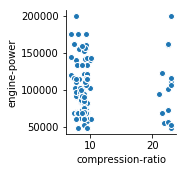

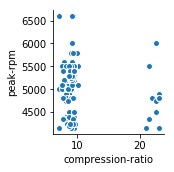

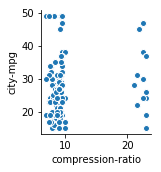

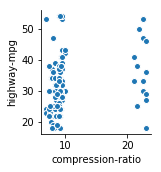

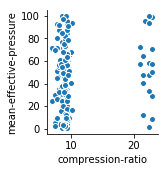

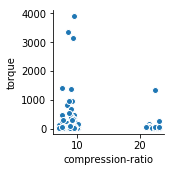

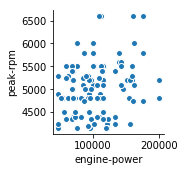

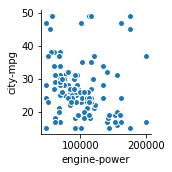

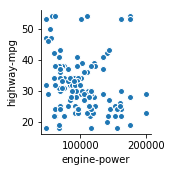

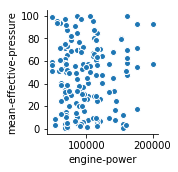

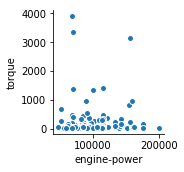

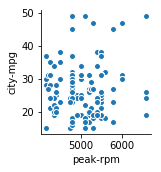

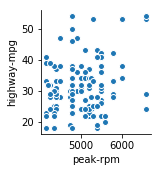

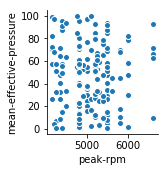

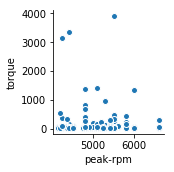

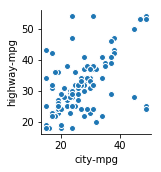

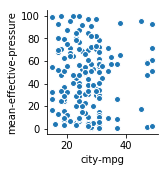

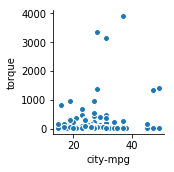

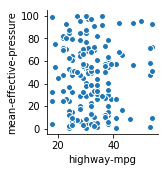

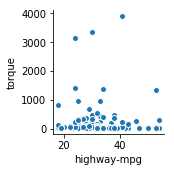

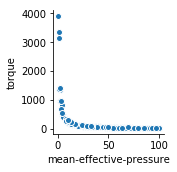

In [66]:
# Your code goes here
l = [x for x in itertools.combinations((auto_numeric.drop(['price'],axis=1)).columns,2)]
for x in l:
    sns.pairplot(auto_numeric,x_vars=x[0], y_vars=x[1])

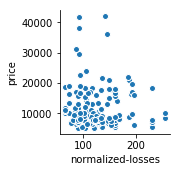

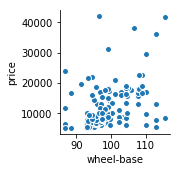

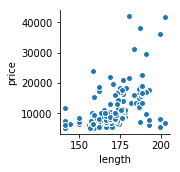

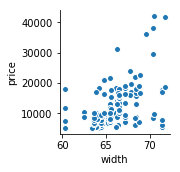

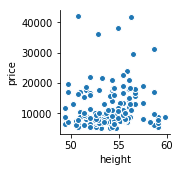

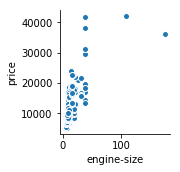

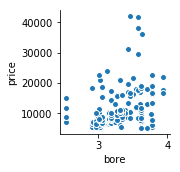

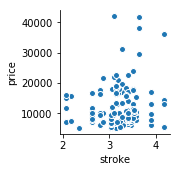

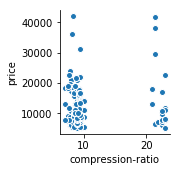

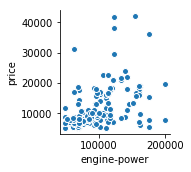

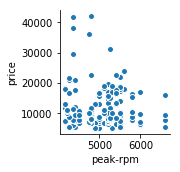

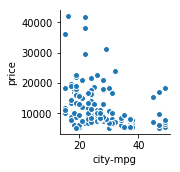

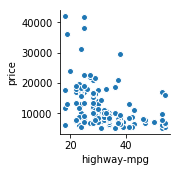

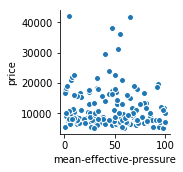

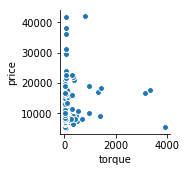

In [65]:
for x in auto_numeric.drop(['price'],axis=1):
    sns.pairplot(auto_numeric,x_vars=x, y_vars='price')

*Your answer goes here*   
1. attributes are particularly good at predicting the price. Can you find any?  
length, width. 
1. Do any attributes appear useless at predicting the price?  
compression-ratio,torque.
2. Do any attributes exhibit significant correlations?    
wheel-base, length
3. Of the attributes you listed, which ones could you safely remove?   
Compression-ratio. The data is divided into two groups, one with compression-ratio between 0-10, the other is 20 above. For each of the two groups, the price varies from 40000 above to 10000 below in a similar range. Price varis in a way that has no relationship with the values of compression-ration. So the compression-ration data will not contribute too much to the linear regression model learning.
 



### ========== Question 2.2 --- [3 marks] ==========
We will now make a first attempt at building a Multivariate Linear Regression model using all numeric attributes. Initialise a `LinearRegression` model and predict the output by using 5-fold cross-validation and the `cross_val_predict` function.

In [106]:
# Your code goes here
X_multi = auto_numeric.drop(['price'],axis=1).values
cv_predict_multi = cross_val_predict(new_lr, X_multi, y, cv = kf)

### ========== Question 2.3 --- [2 marks] ==========
Display the Root Mean Squared Error (RMSE), Mean Absolute Error (MAE) and Correlation Coefficient (CC).

In [108]:
# Your code goes here
COD = r2_score(y,cv_predict_multi)
MAE = mean_absolute_error(y,cv_predict_multi)
RMSE = np.sqrt(mean_squared_error(y, cv_predict_multi))
CC = np.corrcoef(y,cv_predict_multi)

print('''Coefficient of Determination (R^2): {}
Root Mean Squared Error (RMSE): {}
Mean Absolute Error (MAE): {}
Correlation Coefficient (CC): \n{}'''.format(COD,RMSE,MAE,CC))

Coefficient of Determination (R^2): 0.486137984457
Root Mean Squared Error (RMSE): 4819.80464283
Mean Absolute Error (MAE): 3050.34459963
Correlation Coefficient (CC): 
[[ 1.          0.74256027]
 [ 0.74256027  1.        ]]


### ========== Question 2.4 --- [2 marks] ==========
 Comment on each metric display above in comparison to what you have obtained for the Simple Linear Regression model in Question 1.19.

*Your answer goes here*  
R^2: multi-lr model is better with 0.486 beats the simple-lr model with 0.173. So multi lr model reach a higher accurary.  
MAE: The multi-lr model shows a better values, so in general, the prediction of multi-lr model is closer to the real values than the simple-lr model.   
RMSE:  The multi-lr model's RMSE is smaller, so there are less large residuals.   
CC: A much bigger positive CC was given by the multi-lr model which implies a better ability to capture the distribution of the real price. 

### ========== Question 2.5 --- [2 marks] ==========
Examine the histogram for the `engine-size` attribute. Choose a sensible value for the number of bins in the histogram. Label axes appropriately and include a title in your plot.

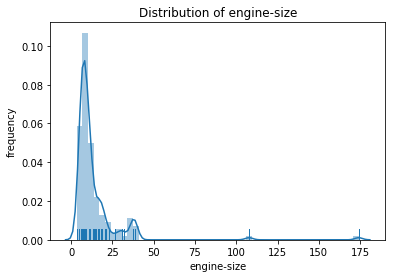

In [133]:
# Your code goes here
plt.title('Distribution of engine-size')
sns.distplot(auto_numeric['engine-size'], rug=True)
plt.ylabel('frequency')

### ========== Question 2.6 --- [2 marks] ==========
Is the distribution expected to cause a problem for regression? Explain your answer in 2-3 sentences.

*Your answer goes here*  
The data is non-normally distributed, with some data points varies far away from the majority. This can distort the regression relationships. 

### ========== Question 2.7 --- [3 marks] ==========
Transform this attribute using an appropriate simple technique from the lectures. Plot the histogram of the transformed attribute.

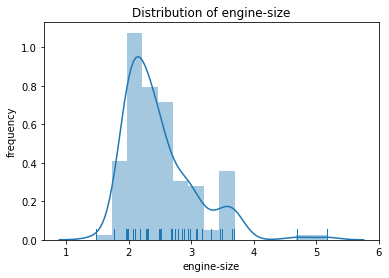

In [150]:
# Your code goes here
engine_size_transform = np.log(auto_numeric['engine-size']+1)

plt.title('Distribution of engine-size')
sns.distplot(engine_size_transform, rug=True)
plt.ylabel('frequency')

### ========== Question 2.8 --- [3 marks] ==========
Now re-build a Linear Regression model on the transformed dataset and report the R^2, RMSE, MAE and CC metrics.

In [225]:
# Your code goes here
# Your code goes here
auto_numeric_log = np.log(auto_numeric)
X_multi_log = auto_numeric_log.drop(['price'],axis=1).values
y_log = auto_numeric_log['price']
cv_predict_multi_log = cross_val_predict(new_lr, X_multi_log, y_log, cv = kf)

COD = r2_score(y_log,cv_predict_multi_log)
MAE = mean_absolute_error(y_log,cv_predict_multi_log)
RMSE = np.sqrt(mean_squared_error(y_transf, cv_predict_multi_log))
CC = np.corrcoef(y_log,cv_predict_multi_log)

print('''Coefficient of Determination (R^2): {}
Root Mean Squared Error (RMSE): {}
Mean Absolute Error (MAE): {}
Correlation Coefficient (CC): \n{}'''.format(COD,RMSE,MAE,CC))

Coefficient of Determination (R^2): 0.820340758596
Root Mean Squared Error (RMSE): 0.194753330918
Mean Absolute Error (MAE): 0.146401214218
Correlation Coefficient (CC): 
[[ 1.          0.90611595]
 [ 0.90611595  1.        ]]


### ========== Question 2.9 --- [3 marks] ==========
How has the performance of your model changed? Explain your answer in 1-2 sentences.

*Your answer goes here*  
Generally the performance becomes better.   
The accuracy is increased with much smaller residuals and a higher correlation to capture the targets distribution. 

### ========== Question 2.10 --- [2 marks] ==========
So far we have performed regression with numeric attributes. We will now attempt to integrate nominal (categorical) attributes into our regression model. 
Load the dataset `train_auto_full.csv` into a pandas DataFrame called `auto_full`. Display the number of samples and attributes in the dataset. Also, display the first 20 instances of the dataset. *Hint: Execute the cell below to change the default for `max_columns` display option in pandas.*

In [14]:
pd.set_option('max_columns', 30)

In [17]:
# Your code goes here
data_path = os.path.join(os.getcwd(), 'datasets', 'train_auto_full.csv')
auto_full = pd.read_csv(data_path, delimiter = ',')
print('The number of samples is {}, and #attributes is {}'.format(auto_full.shape[0],auto_full.shape[1]))
auto_full.head(20)

The number of samples is 159, and #attributes is 27


,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,engine-power,peak-rpm,city-mpg,highway-mpg,symboling,mean-effective-pressure,torque,price
0,164.0,audi,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,ohc,4,8.85,mpfi,3.19,3.40,10.00,102000.0,5500.0,24.0,30.0,2,40.52,57.68,13950.0
1,110.0,audi,gas,std,4,sedan,4wd,front,99.4,162.4,66.4,54.3,ohc,5,15.18,mpfi,3.19,3.40,8.00,115000.0,5500.0,18.0,22.0,2,47.39,59.59,17450.0
2,158.0,audi,gas,std,4,sedan,fwd,front,105.8,192.7,71.4,51.6,ohc,5,15.18,mpfi,3.94,2.80,8.50,70000.0,4400.0,28.0,30.0,1,0.85,3344.79,17710.0
3,106.0,audi,gas,turbo,4,sedan,fwd,front,86.6,158.7,67.7,55.9,ohc,5,13.74,mpfi,3.13,3.50,7.80,140000.0,5600.0,32.0,20.0,1,44.74,68.97,23875.0
4,192.0,bmw,gas,std,2,sedan,rwd,front,101.2,176.8,64.8,54.3,ohc,4,8.67,mpfi,3.50,2.80,8.80,101000.0,5800.0,23.0,29.0,2,44.78,53.48,16430.0
5,194.0,bmw,gas,std,4,sedan,rwd,front,110.0,190.9,71.4,58.7,ohc,4,8.67,mpfi,3.78,3.90,22.50,101000.0,6000.0,47.0,53.0,0,1.80,1330.28,16925.0
6,188.0,bmw,gas,std,2,sedan,rwd,front,101.2,176.8,64.8,54.3,ohc,6,26.58,mpfi,3.31,3.19,9.00,121000.0,4250.0,21.0,28.0,0,7.19,377.06,20970.0
7,150.0,bmw,gas,std,4,sedan,rwd,front,101.2,176.8,64.8,56.1,ohc,6,26.58,mpfi,3.03,3.19,8.00,134000.0,4400.0,28.0,37.0,0,57.37,48.20,21105.0
8,121.0,chevrolet,gas,std,2,hatchback,fwd,front,88.4,141.1,60.3,53.2,l,3,3.39,2bbl,3.03,3.03,9.50,48000.0,5300.0,47.0,53.0,2,59.33,25.08,5151.0
9,98.0,chevrolet,gas,std,2,hatchback,fwd,front,104.3,155.9,68.3,52.0,ohc,4,6.05,2bbl,3.31,3.47,7.80,70000.0,5000.0,34.0,34.0,1,51.55,36.35,6295.0


### ========== Question 2.11 --- [3 marks] ==========
This dataset contains a mixture of numeric and nominal attributes. Name the variables that you think are categorical. Why can we not use the nominal attributes in their current form for the purposes of regression? 

*Your answer goes here*  
categorical: ['make','fuel-type','aspiration','body-style','drive-wheels','engine-location','engine-type','fuel-system']   

We can not use these nominal attributes directly because they may be categorical or ordinal. These values carry no meaning in quantification. While in regression model, the attributes values need to represent its own actual quantification.

### ========== Question 2.12 --- [5 marks] ==========
Now we want to convert the categorical variables by using [One-Hot-Encoding](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder). Familiarise yourself with the class. One limitation with this module is that it can deal only with categorical attributes in integer format (remember that in our example we have attributes in string format). 

Copy the `auto_full` dataframe into a new dataframe `auto_full_edit` and transform the categorical variables by using [Label Encoding](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html). Then transform again the categorical variables by using One-Hot-Encoding. Make sure you don't transform the continuous variables. *Hint: make appropriate use of the `categorical_features` parameter in [`OneHotEncoder`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder).*

Store the transformed attributes into a numpy array `X_enc` and display its dimensionality.  


In [18]:
# Your code goes here
# Copy the auto_full dataframe into a new dataframe auto_full_edit
auto_full_edit = auto_full.copy(deep=True)
cat_var = ['make','fuel-type','aspiration','body-style','drive-wheels','engine-location','engine-type','fuel-system']
# transform the categorical variables by using Label Encoding.
le_dict = dict() # Initialise an empty dictionary to keep all LabelEncoders
for column in cat_var:  
    le = LabelEncoder().fit(auto_full[column]) # Initialise the LabelEncoder and fit
    auto_full_edit[column] = le.transform(auto_full[column]) # Transform data and save in new DataFrame
    le_dict[column] = le # Store the LabelEncdoer in dictionary
# transform again the categorical variables by using One-Hot-Encoding
cat_ind=[]
for i,c in enumerate(auto_full_edit.columns):
    #auto_full_edit.rename(columns={c: i+1}, inplace=True)
    if c in cat_var:
        cat_ind.append(i)
#print(cat_ind)
enc = OneHotEncoder(categorical_features=cat_ind)
X_enc = auto_full_edit.drop(['price'],axis=1).values
#print(X_enc.shape)
enc.fit(X_enc)
X_enc = enc.transform(X_enc).toarray()
print("X_enc dimensionality: {}".format(X_enc.shape))
#auto_full_edit.head(10)

X_enc dimensionality: (159L, 60L)


### ========== Question 2.13 --- [2 marks] ==========
By using the transformed data train a multivariate linear regression model and by using 5-fold cross-validation report the R^2, RMSE, MAE and CC metrics.

In [19]:
# Your code goes here
y_full = auto_full['price']
lr = LinearRegression(normalize=True)
cv_predict_multi_enc = cross_val_predict(lr, X_enc, y_full, cv = kf)

COD = r2_score(y_full,cv_predict_multi_enc)
MAE = mean_absolute_error(y_full,cv_predict_multi_enc)
RMSE = np.sqrt(mean_squared_error(y_full, cv_predict_multi_enc))
CC = np.corrcoef(y_full,cv_predict_multi_enc)

print('''Coefficient of Determination (R^2): {}
Root Mean Squared Error (RMSE): {}
Mean Absolute Error (MAE): {}
Correlation Coefficient (CC): \n{}'''.format(COD,RMSE,MAE,CC))

Coefficient of Determination (R^2): -3.58889855736e+24
Root Mean Squared Error (RMSE): 1.27375754382e+16
Mean Absolute Error (MAE): 1.60236311107e+15
Correlation Coefficient (CC): 
[[ 1.          0.28917327]
 [ 0.28917327  1.        ]]


### ========== Question 2.14 --- [4 marks] ==========
How does this more complex model perform with respect to your best performing model from either question 2.3 or 2.8? List one advantage and one disadvantage of using the more complex model.

*Your answer goes here*  
This more complext model overall perform is much worse than our best performing model from Q2.8.  
Advantage of using the more complex model: provide more information which may help to complement the model.  
Disadvantage: For a model with only a small amount of training samples available, using too many features may cause overfitting.


### ========== Question 2.15 --- [4 marks] ==========
Finally, experiment with tree-based regressors (e.g. [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html), [`RandomForestRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)) and report 5-fold cross-validation scores for R^2, RMSE, MAE and CC. Has your performance improved? Explain your answer in 1-2 sentences.

In [227]:
# Your code goes here
lr_tree = DecisionTreeRegressor(random_state=0)
cv_predict_multi_tree = cross_val_predict(lr_tree, X_enc, y, cv = kf)

COD = r2_score(y,cv_predict_multi_tree)
MAE = mean_absolute_error(y,cv_predict_multi_tree)
RMSE = np.sqrt(mean_squared_error(y, cv_predict_multi_tree))
CC = np.corrcoef(y,cv_predict_multi_tree)

print('''Coefficient of Determination (R^2): {}
Root Mean Squared Error (RMSE): {}
Mean Absolute Error (MAE): {}
Correlation Coefficient (CC): \n{}'''.format(COD,RMSE,MAE,CC))

Coefficient of Determination (R^2): 0.683248865417
Root Mean Squared Error (RMSE): 3784.12319962
Mean Absolute Error (MAE): 2324.06289308
Correlation Coefficient (CC): 
[[ 1.          0.83659594]
 [ 0.83659594  1.        ]]


*Your answer goes here*  
The performance improved.
As linear regression is a global model which trying to learn the whole data space with one single predictive function. It becomes difficult for linear model to handle data with lots of features which interact nonlinearly with each other.  
However, a tree-base regression could handle more complex relationships than simple linear relatioship. Because it is based on recursive partitioning data with different rules. That also means it does not rely on data transformation. So it perform better than linear regression model here.